# 1번
날씨 온도 예측, 종속변수 :actual(최고온도)   
데이터 출처 : https://towardsdatascience.com/random-forest-in-python-24d0893d51c0     
데이터 경로 : /kaggle/input/adp-kr-p2/problem1.csv    
temp_1 : 전날 최고온도    
temp_2 : 전전날 최고온도    
friend : 친구의 예측온도     



In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### 1-1 데이터 확인 및 전처리
- 데이터 EDA 수행     
- 결측치를 확인하고 처리 방안에 대해 논의하라  
- 데이터 분할 방법 설명     
- 최종 데이터셋이 적절함을 주장하라     

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/20/problem1.csv')
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [4]:
df.shape

(348, 12)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [23]:
print('날씨 온도에 대한 다양한 예측과 시간(년, 월 ,일, 요일) 정보가 들어 있으며, 종속변수를 포함하여 12개의 컬럼이 있고, 데이터 건수는 348건이다.')
print('수치적 결측치는 확인되지 않지만, 해당 데이터가 2016년 전체 데이터라는 것을 고려했을 때 18개의 결측치가 있는 것으로 볼 수 있다. 하지만 본 분석에서는 시계열 분석을 하지 않기 때문에 별도의 전처리를 하지 않는다.')
print('보통 시계열 데이터는 시간을 고려한 데이터 분할이 필요하지만, 여기에서는 시계열 모델을 적용하지 않으며, 날씨 온도의 특성 상 계절의 영향을 많이 받기 때문에 시간을 고려한 분할은 오히려 부적절하다.')
print('그러므로, 단순 8:2 분할을 사용한다.')

날씨 온도에 대한 다양한 예측과 시간(년, 월 ,일, 요일) 정보가 들어 있으며, 종속변수를 포함하여 12개의 컬럼이 있고, 데이터 건수는 348건이다.
수치적 결측치는 확인되지 않지만, 해당 데이터가 2016년 전체 데이터라는 것을 고려했을 때 18개의 결측치가 있는 것으로 볼 수 있다. 하지만 본 분석에서는 시계열 분석을 하지 않기 때문에 별도의 전처리를 하지 않는다.
보통 시계열 데이터는 시간을 고려한 데이터 분할이 필요하지만, 여기에서는 시계열 모델을 적용하지 않으며, 날씨 온도의 특성 상 계절의 영향을 많이 받기 때문에 시간을 고려한 분할은 오히려 부적절하다.
그러므로, 단순 8:2 분할을 사용한다.


In [24]:
w_col = ['temp_2', 'temp_1', 'average', 'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend', 'actual']

<Axes: >

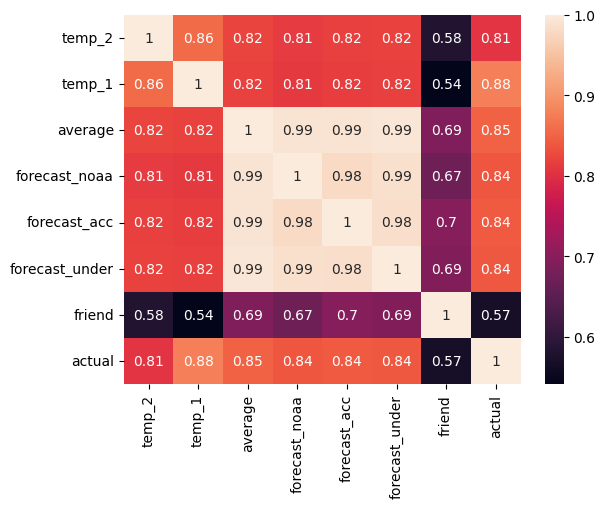

In [25]:
sns.heatmap(df.loc[:, w_col].corr(), annot=True)

In [26]:
print("'average', 'forecast_noaa', 'forecast_acc', 'forecast_under' 변수 간의 상관성이 매우 높다.")
print("또한, temp_1과 temp_2의 선형 상관관계도 0.86으로 높은 편이다. 차원축소 방법론을 통해 적절한 변수를 선택하는 작업이 필요해 보인다.")
print('friend 변수는 종속변수인 actual과 상관관계가 다른 변수에 비해 낮으므로 적절하지 않은 변수로 생각되어 제거한다.')
print("상관관계를 표현한 heatmap에서, friendf를 제외한 독립 변수들이 2개로 클러스터링 되는 것을 확인하였으므로, 요인 분석으로 2개의 독립변수를 생성한다.")

'average', 'forecast_noaa', 'forecast_acc', 'forecast_under' 변수 간의 상관성이 매우 높다.
또한, temp_1과 temp_2의 선형 상관관계도 0.86으로 높은 편이다. 차원축소 방법론을 통해 적절한 변수를 선택하는 작업이 필요해 보인다.
friend 변수는 종속변수인 actual과 상관관계가 다른 변수에 비해 낮으므로 적절하지 않은 변수로 생각되어 제거한다.
상관관계를 표현한 heatmap에서, friendf를 제외한 독립 변수들이 2개로 클러스터링 되는 것을 확인하였으므로, 요인 분석으로 2개의 독립변수를 생성한다.


In [30]:
from factor_analyzer import FactorAnalyzer

In [32]:
w_col.remove('actual')

In [33]:
fa = FactorAnalyzer()

fa.fit(df.loc[:, w_col], 5)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([5.95535044e+00, 5.27352531e-01, 3.40646068e-01, 1.39975274e-01,
       1.96031855e-02, 1.35038700e-02, 3.56863083e-03])

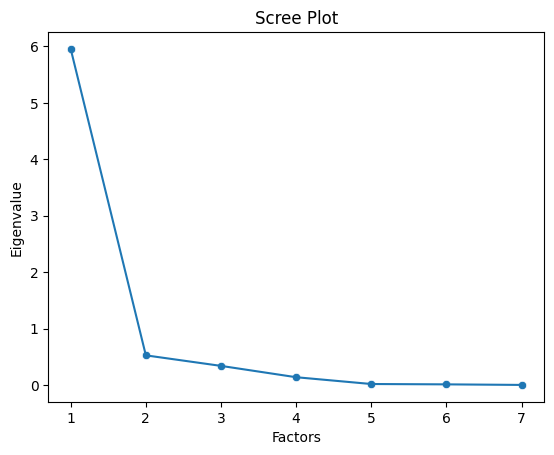

In [36]:
# Create scree plot
sns.scatterplot(x=range(1, df.shape[1]-4), y=ev)
sns.lineplot(x=range(1, df.shape[1]-4), y=ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.show()

In [37]:
print('Scree plot으로, 2개 변수 요인분석이 적절함을 확인하였다.')

Scree plot으로, 2개 변수 요인분석이 적절함을 확인하였다.


In [38]:
fa = FactorAnalyzer(2, rotation="varimax")
fa.fit(df.loc[:, w_col])

FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

<Axes: >

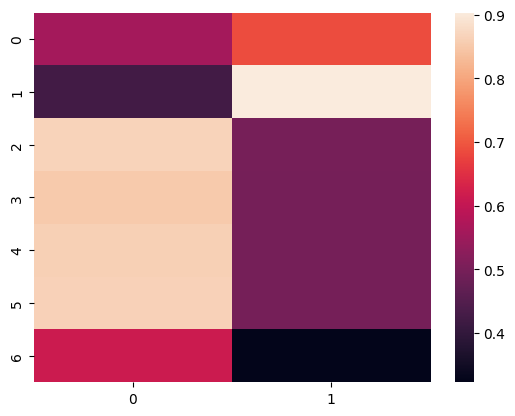

In [39]:
# 요인 적재량
sns.heatmap(pd.DataFrame(fa.loadings_))

In [46]:
df_fa = pd.DataFrame(fa.fit_transform(df.loc[:, w_col]), columns=['Factor1', 'Factor2'])
df_fa

,Factor1,Factor2
0,-0.820705,-1.265005
1,-0.814198,-1.225638
2,-0.798599,-1.305892
3,-0.561945,-1.696509
4,-0.590427,-1.778121
...,...,...
343,-0.511636,-1.661825
344,-1.039278,-0.939507
345,-1.097028,-0.797838
346,-1.245731,-0.748714


### 1-2 Random Forest 모델 적합 및 검증  
- Random Forest 학습 및 예측 결과 해석    
- 예측 결과 검정 해석, 중요변수 도출    
- 변수 중요성 분석 및 그래프 출력     

In [53]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
x = df_fa
y = df['actual']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [51]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [52]:
pred = rf.predict(x_test)

In [54]:
rmse = mean_squared_error(pred, y_test, squared=False)
r2 = r2_score(pred, y_test)

In [61]:
rf.feature_importances_

array([0.45053858, 0.54946142])

<Axes: >

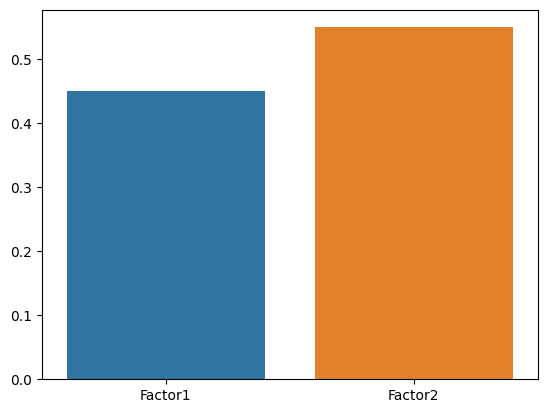

In [58]:
sns.barplot(x=x.columns, y=rf.feature_importances_)

In [62]:
print(f'''
Test data의 예측값으로 계산한 Random Forest 모델의 결정계수는 {r2}로, 약 79%의 데이터를 모델로 설명 가능함을 의미한다. 또한, 모델의 Root MSE는 {rmse} 이다.
변수 중요도는 Factor 1이 0.45, Factor 2가 0.55로, Factor 2가 좀 더 중요한 역할을 했음을 보여준다. Factor 2는 'average', 'forecast_noaa', 'forecast_acc', 'forecast_under'로 구성된 변수이다.
''')


Test data의 예측값으로 계산한 Random Forest 모델의 결정계수는 0.7864091315124253로, 약 79%의 데이터를 모델로 설명 가능함을 의미한다. 또한, 모델의 Root MSE는 4.977871174364743 이다.
변수 중요도는 Factor 1이 0.45, Factor 2가 0.55로, Factor 2가 좀 더 중요한 역할을 했음을 보여준다. Factor 2는 'average', 'forecast_noaa', 'forecast_acc', 'forecast_under'로 구성된 변수이다.



### 1-3 SVM(Support Vector Machine) 모델 적합 및 검증 
- svm 학습 및 예측 결과 해석    
- 예측 결과 검정 해석, 중요변수 도출    
- 변수 중요성 분석 및 그래프 출력     

In [63]:
from sklearn.svm import SVR

In [65]:
svr = SVR()
svr.fit(x_train, y_train)

SVR()

In [66]:
pred = svr.predict(x_test)

In [67]:
rmse = mean_squared_error(pred, y_test, squared=False)
r2 = r2_score(pred, y_test)

In [70]:
print(f'''
Test data의 예측값으로 계산한 SVR 모델의 결정계수는 {r2}로, 약 34%의 데이터를 모델로 설명 가능함을 의미한다. 또한, 모델의 Root MSE는 {rmse} 이다.
SVM 모델의 경우 변수 중요도를 도출할 수 없지만, Random Forest 모델과 동일한 순위를 가질 것으로 예측된디ㅏ.
''')


Test data의 예측값으로 계산한 Random Forest 모델의 결정계수는 0.3371097524260521로, 약 34%의 데이터를 모델로 설명 가능함을 의미한다. 또한, 모델의 Root MSE는 6.667694877013945 이다.




### 1-4 모델 비교 및 향후 개선 방향 도출
- Random Forest, SVM 모델의 결과 비교 후 최종 모델 선택    
- 두 모델의 장단점 분석, 추후 운영 관점에서 어떤 모델을 선택할 것인가?    
- 모델링 관련 추후 개선 방향 제시     

In [ ]:
print('''
Random Forest 모델의 결정계수, Root MSE 모두 SVM 모델에 비해 더 좋은 성능을 보였다. 하지만 학습 속도 측면에서는 SVM이 조금 더 낫긴 하지만 속도의 영향을 느끼기 힘든 데이터 양이기도 하고, 결정계수의 차이가 매우 크게 벌어져 있다.
그리고 Random Forest 모델은 변수의 중요도를 살펴볼 수 있어 Random Forest 모델을 선택한다.
또한, 파라미터 튜닝을 추가로 진행한다면 지금보다 조금 더 나은 성능을 기대해 볼 수 있을 것이다.
''')

# 2번 
5분간격의 가구별 전력 사용량의 데이터    
데이터 출처 : 자체생성    
데이터 경로 : /kaggle/input/adp-kr-p2/problem2.csv    

### 2-1 데이터 전처리
각 가구의 15분간격의 전력량의 합을 구하고 해당데이터를 바탕으로 총 5개의 군집으로 군집화를 진행한 후 아래의 그림과 같은 형태로 출력하라.    
군집화를 위한 데이터 구성의 이유를 설명하라    
(군집 방식에 따라 Cluster컬럼의 값은 달라질수 있음)
![image](https://github.com/Datamanim/datarepo/blob/main/adp/p2/problem2.png?raw=true)

In [135]:
ttt= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/20/problem2.csv')

In [136]:
ttt = ttt.sort_values(by=['houseCode', 'date']).reset_index(drop=True)
ttt.head()

,houseCode,date,power consumption
0,house_00,2050-01-01 00:00:00,58.253938
1,house_00,2050-01-01 00:05:00,21.731130
2,house_00,2050-01-01 00:10:00,56.264884
3,house_00,2050-01-01 00:15:00,27.894691
4,house_00,2050-01-01 00:20:00,24.690939


In [118]:
ttt.date = pd.to_datetime(ttt.date)
new_ttt = ttt.groupby("houseCode").resample('15min', on='date').sum()
new_ttt.drop('houseCode', axis=1, inplace=True)

In [ ]:
new_ttt["houseCode"] = new_ttt.index.get_level_values(0)
new_ttt = new_ttt.droplevel([0])

In [84]:
from sklearn.cluster import KMeans

In [131]:
k = 5
kmeans = KMeans(n_clusters=k)
pred = kmeans.fit_predict(new_ttt[['power consumption']])

/Users/hyunjoong/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [132]:
new_ttt['cluster'] = pred

In [134]:
new_ttt

,power consumption,houseCode,cluster
date,,,
2050-01-01 00:00:00,136.249952,house_00,3
2050-01-01 00:15:00,98.283387,house_00,3
2050-01-01 00:30:00,53.967679,house_00,3
2050-01-01 00:45:00,204.821270,house_00,0
2050-01-01 01:00:00,150.760786,house_00,0
...,...,...,...
2050-01-31 22:45:00,334.675717,house_44,4
2050-01-31 23:00:00,463.419892,house_44,2
2050-01-31 23:15:00,369.930740,house_44,4


In [100]:
print('''
houseCode 별로 군집화하여, 전력량의 house 별 15분 단위 합을 계산한 다음, 이 변수를 가지고 K-Means 군집화를 진행한다.
''')


houseCode 별로 군집화하여, 전력량의 house 별 합을 계산한 다음, 이 변수를 가지고 K-Means 군집화를 진행한다.



### 2-2 히트맵
2-1의 데이터를 바탕으로 각 군집의 요일, 15분간격별 전력사용량의 합을 구한 후 아래와 같이 시각화 하여라    
(수치는 동일하지 않을 수 있음 2-1의 데이터가 정확하게 아래와 같은 이미지로 변환 됐는지 주로 확인)     
![image](https://github.com/Datamanim/datarepo/blob/main/adp/p2/problem2_Example.png?raw=true)

In [137]:
print('''
Heatmap을 도출하기 위해, date에서 요일을 계산해서 wd 변수를 추가한다.
''')


Heatmap을 도출하기 위해, date에서 요일을 계산해서 wd 변수를 추가한다.



In [224]:
new_ttt['wd'] = new_ttt.index.weekday
new_ttt['time'] = new_ttt.index.strftime('%H:%M')

In [225]:
new_ttt

,power consumption,houseCode,cluster,wd,time
date,,,,,
2050-01-01 00:00:00,136.249952,house_00,3,5,00:00
2050-01-01 00:15:00,98.283387,house_00,3,5,00:15
2050-01-01 00:30:00,53.967679,house_00,3,5,00:30
2050-01-01 00:45:00,204.821270,house_00,0,5,00:45
2050-01-01 01:00:00,150.760786,house_00,0,5,01:00
...,...,...,...,...,...
2050-01-31 22:45:00,334.675717,house_44,4,0,22:45
2050-01-31 23:00:00,463.419892,house_44,2,0,23:00
2050-01-31 23:15:00,369.930740,house_44,4,0,23:15


In [226]:
def get_wd_name(wd):
  return {0 : "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}.get(wd, np.NaN)

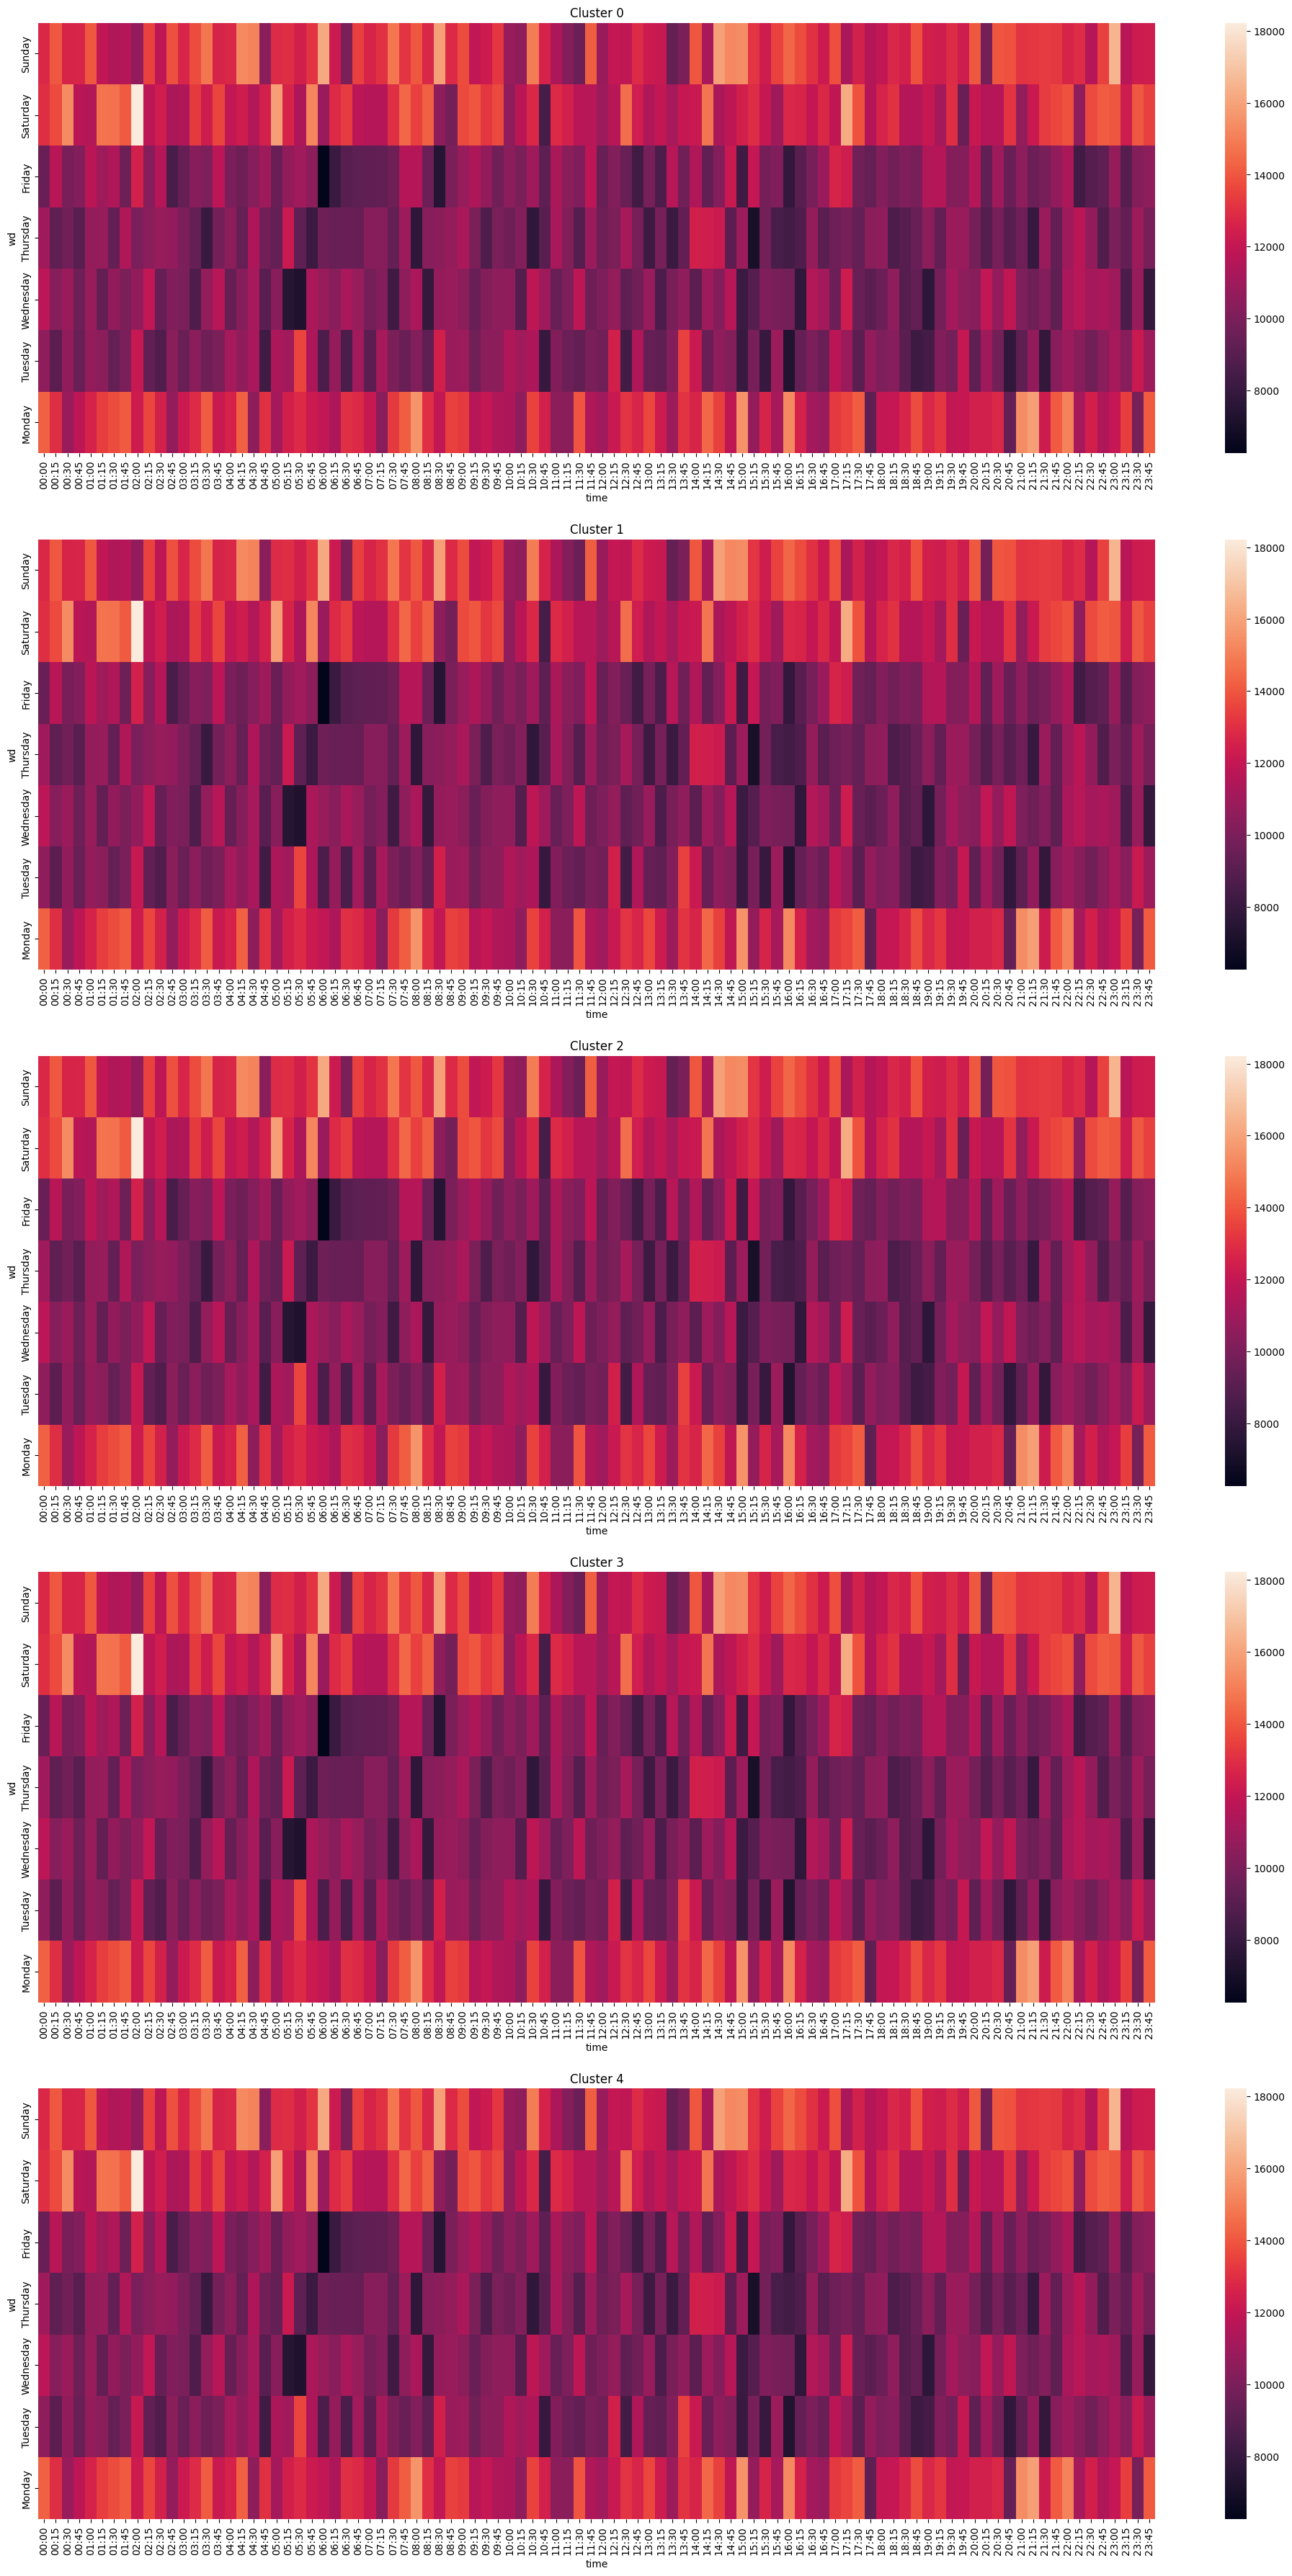

In [227]:
nrow = 5
fig, axes = plt.subplots(nrows=nrow, figsize=(25, 45))
for i in range(nrow):
    cluster = new_ttt.groupby(['cluster', 'wd', 'time']).sum().loc[0]
    cluster["wd"] = cluster.index.get_level_values(0)
    for idx in cluster.index:
        cluster.loc[idx, "wd"] = get_wd_name(cluster.loc[idx, "wd"])
    cluster = cluster.droplevel([0])
    cluster.reset_index(inplace=True)
    sns.heatmap(cluster.pivot_table(index='wd', columns='time', values='power consumption').reindex(["Sunday", "Saturday", "Friday", "Thursday", "Wednesday", "Tuesday", "Monday"]), ax=axes[i])
    axes[i].set_title("Cluster " + str(i))

# 3번 태양광 데이터
예측 변수 :SOLAR PV


데이터 경로 : /kaggle/input/adp-kr-p2/problem3.csv    
데이터 출처 : https://www.kaggle.com/cheedcheed/california-renewable-production-20102018

In [257]:
from sklearn.model_selection import train_test_split

### 3-1
**데이터셋 분할 및 결과 검증**    
- 데이터셋 7:3 분할    
- 데이터 전처리 및 예측 모델 생성    
- 모델 성능 검증 : RMSE, R제곱, 정확도(아래 방식으로 연산)로 구하여라    
- 정확도의 경우 실제값>예측값인 경우 (1-예측값/실제값), 실제값<예측값인 경우 (1- 실제값/예측값)으로 하고 이것들을 평균낸 후 1에서 뺀값으로 한다.   
  분수식의 분모가 0인 경우의 정확도는 0.5로 취급한다.

- 최종 결과 제출 : 소수점 3째자리 반올림     

In [228]:
df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/20/problem3.csv')
df.head()

,TIMESTAMP,BIOGAS,BIOMASS,GEOTHERMAL,Hour,SMALL HYDRO,SOLAR,SOLAR PV,SOLAR THERMAL,WIND TOTAL
0,2012-11-26 00:00:00,208.0,354.0,926.0,1.0,208.0,NaN,0.0,0.0,57.0
1,2012-11-26 01:00:00,207.0,354.0,927.0,2.0,207.0,NaN,0.0,0.0,76.0
2,2012-11-26 02:00:00,208.0,353.0,927.0,3.0,208.0,NaN,0.0,0.0,100.0
3,2012-11-26 03:00:00,208.0,350.0,927.0,4.0,209.0,NaN,0.0,0.0,111.0
4,2012-11-26 04:00:00,209.0,352.0,927.0,5.0,209.0,NaN,0.0,0.0,131.0


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44904 entries, 0 to 44903
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TIMESTAMP      44904 non-null  object 
 1   BIOGAS         44904 non-null  float64
 2   BIOMASS        44904 non-null  float64
 3   GEOTHERMAL     44904 non-null  float64
 4   Hour           44904 non-null  float64
 5   SMALL HYDRO    44904 non-null  float64
 6   SOLAR          0 non-null      float64
 7   SOLAR PV       44904 non-null  float64
 8   SOLAR THERMAL  44904 non-null  float64
 9   WIND TOTAL     44904 non-null  float64
dtypes: float64(9), object(1)
memory usage: 3.4+ MB


In [248]:
df

,TIMESTAMP,BIOGAS,BIOMASS,GEOTHERMAL,Hour,SMALL HYDRO,SOLAR PV,SOLAR THERMAL,WIND TOTAL
0,2012-11-26 00:00:00,208.0,354.0,926.0,1.0,208.0,0.0,0.0,57.0
1,2012-11-26 01:00:00,207.0,354.0,927.0,2.0,207.0,0.0,0.0,76.0
2,2012-11-26 02:00:00,208.0,353.0,927.0,3.0,208.0,0.0,0.0,100.0
3,2012-11-26 03:00:00,208.0,350.0,927.0,4.0,209.0,0.0,0.0,111.0
4,2012-11-26 04:00:00,209.0,352.0,927.0,5.0,209.0,0.0,0.0,131.0
...,...,...,...,...,...,...,...,...,...
44899,2018-01-16 19:00:00,240.0,339.0,974.0,20.0,495.0,0.0,0.0,213.0
44900,2018-01-16 20:00:00,239.0,334.0,976.0,21.0,461.0,0.0,0.0,235.0
44901,2018-01-16 21:00:00,239.0,334.0,971.0,22.0,451.0,0.0,0.0,288.0
44902,2018-01-16 22:00:00,241.0,326.0,972.0,23.0,393.0,0.0,0.0,303.0


In [ ]:
df.drop('SOLAR', axis=1, inplace=True)
df.TIMESTAMP = pd.to_datetime(df.TIMESTAMP)

df_up = df.resample('H', on='TIMESTAMP').mean()
df_up

In [252]:
df_up.isna().sum()

BIOGAS           168
BIOMASS          168
GEOTHERMAL       168
Hour             168
SMALL HYDRO      168
SOLAR PV         168
SOLAR THERMAL    168
WIND TOTAL       168
dtype: int64

In [255]:
df_up = df_up.interpolate(method='values')

In [256]:
df_up.isna().sum()

BIOGAS           0
BIOMASS          0
GEOTHERMAL       0
Hour             0
SMALL HYDRO      0
SOLAR PV         0
SOLAR THERMAL    0
WIND TOTAL       0
dtype: int64

In [262]:
print('''
SOLAR 변수는 모든 값이 NA이기 때문에, 변수를 제거한다. 이외에 보이는 수치적인 이상치는 없어 보이나, 시간 값에 따라 비는 부분이 있는지 확인한다.
기존 단위인 1시간 단위로 resample 진행하니, 168개의 결측치가 파악되었다. 이를 선형 보간으로 변수를 채워준다.
''')


SOLAR 변수는 모든 값이 NA이기 때문에, 변수를 제거한다. 이외에 보이는 수치적인 이상치는 없어 보이나, 시간 값에 따라 비는 부분이 있는지 확인한다.
기존 단위인 1시간 단위로 resample 진행하니, 168개의 결측치가 파악되었다. 이를 선형 보간으로 변수를 채워준다.



<Axes: >

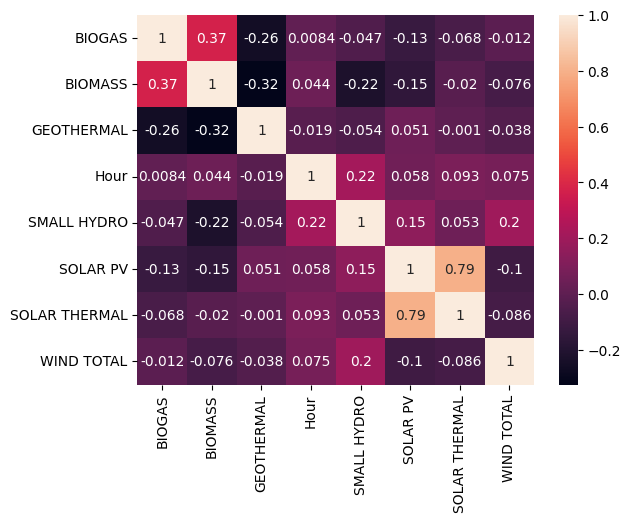

In [261]:
sns.heatmap(df_up.corr(), annot=True)

In [263]:
print('''
각 변수 간 상관성을 확인해 본 결과, 종속변수 (SOLAR PV) 변수와 SOLAR THERMAL 변수의 상관성이 0.79로 높게 나타났다. 이는 모델링 시 SOLAR THERMAL 변수의 영향이 절대적일 수 있음을 시사한다.
''')


각 변수 간 상관성을 확인해 본 결과, 종속변수 (SOLAR PV) 변수와 SOLAR THERMAL 변수의 상관성이 0.79로 높게 나타났다. 이는 모델링 시 SOLAR THERMAL 변수의 영향이 절대적일 수 있음을 시사한다.



In [268]:
df_up

,BIOGAS,BIOMASS,GEOTHERMAL,Hour,SMALL HYDRO,SOLAR PV,SOLAR THERMAL,WIND TOTAL
TIMESTAMP,,,,,,,,
2012-11-26 00:00:00,208.0,354.0,926.0,1.0,208.0,0.0,0.0,57.0
2012-11-26 01:00:00,207.0,354.0,927.0,2.0,207.0,0.0,0.0,76.0
2012-11-26 02:00:00,208.0,353.0,927.0,3.0,208.0,0.0,0.0,100.0
2012-11-26 03:00:00,208.0,350.0,927.0,4.0,209.0,0.0,0.0,111.0
2012-11-26 04:00:00,209.0,352.0,927.0,5.0,209.0,0.0,0.0,131.0
...,...,...,...,...,...,...,...,...
2018-01-16 19:00:00,240.0,339.0,974.0,20.0,495.0,0.0,0.0,213.0
2018-01-16 20:00:00,239.0,334.0,976.0,21.0,461.0,0.0,0.0,235.0
2018-01-16 21:00:00,239.0,334.0,971.0,22.0,451.0,0.0,0.0,288.0


In [269]:
x = df_up.drop('SOLAR PV', axis=1)
y = df_up.loc[:, 'SOLAR PV']

In [270]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [273]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [272]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

pred = rf.predict(x_test)

In [281]:
len(pred)

13522

In [277]:
mse = mean_squared_error(pred, y_test, squared=False)
r2 = r2_score(pred, y_test)

In [300]:
def cal_accuracy(pred, test):
    accuracy_values = list()
    for idx in range(len(pred)):
        if test[idx] > pred[idx]:
            if test[idx]==0:
                accuracy_values.append(0.5)
            else:
                accuracy_values.append(1-(pred[idx]/test[idx]))

        elif pred[idx] > test[idx]:
            if pred[idx] == 0:
                accuracy_values.append(0.5)
            else:
                accuracy_values.append(1-(test[idx]/pred[idx]))
        elif pred[idx] == test[idx]:
            accuracy_values.append(1)

    return np.array(accuracy_values)

In [301]:
accu = cal_accuracy(pred, y_test)

In [304]:
print(f'''
Random Forest 모델의 RMSE는 {round(mse, 3)}, 결정계수는 {round(r2, 3)}, accuracy는 {round(accu.mean(), 3)} 이다.
''')


Random Forest 모델의 RMSE는 462.549, 결정계수는 0.961, accuracy는 0.584 이다.

